# UFO Sightings Analysis
# Webscraping Using All Dataset
## Team Martianas (Angelica, Taryn, Tiffany)



In [1]:
import pandas as pd
import numpy as np
import requests as rs
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup# as soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
# Initialize Chrome webdriver
driver = webdriver.Chrome() 
base_url = "https://nuforc.org/subndx/?id=all"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

# Need to Loop through all website pages
while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Table Data
    table = soup.find('table')
    if not headers:  # Need this because only need the headers once as they are the same
        headers = [th.text.strip() for th in table.find_all('th')]

    # Data rows
    data_rows = table.find_all('tr')[1:]  # This Skips the header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns

    # Need to wait for the next button
    next_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "table_1_next"))
    )

#     # Check if the next button is disabled
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled

    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()

# Due to the amount of pages on the website, this cell will take some time to run
# there will be an 'ElementClickInterceptedException' you can bypass and run the next cell

In [3]:
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999,
1,Open,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999,
2,Open,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999,
3,Open,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999,
4,Open,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999,


In [4]:
df.tail()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
93319,Open,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,None,None
93320,Open,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,None,None
93321,Open,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,None,None
93322,Open,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,None,None
93323,,,,,,,,,None,None


In [5]:
num_rows = len(df)
num_rows

93324

In [6]:
# Cleaning- Do not need these columns to answer questions
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media', 'Posted'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995


In [7]:
# Will need to change Occured and reported to date time
datatypes = df.dtypes 
datatypes

Occurred    object
City        object
State       object
Country     object
Shape       object
Summary     object
Reported    object
dtype: object

In [8]:
# # Reported column shows as obj vs dt; this is why below; date, '', and Y
# Reported = df.get('Reported') 
# Reported_using_get = Reported.tolist()
 # print(Reported_using_get)
    
    

Reported = df['Reported'].value_counts()
print(Reported)


Reported
              62765
Y             30459
02/20/1995        8
02/07/1995        6
02/21/1995        6
02/08/1995        5
02/25/1995        5
02/22/1995        5
02/15/1995        5
02/17/1995        4
01/01/1995        4
02/27/1995        4
02/26/1995        4
02/23/1995        4
02/03/1995        4
02/10/1995        4
02/04/1995        4
02/19/1995        3
02/16/1995        3
02/12/1995        3
02/09/1995        3
02/06/1995        3
02/14/1995        2
02/24/1995        2
01/02/1995        2
02/18/1995        2
03/04/1995        1
02/05/1995        1
02/28/1995        1
03/10/1995        1
01/03/1995        1
Name: count, dtype: int64


In [9]:
# Occured Column showing some blank info... 
# length 192?

Occurred = df['Occurred'].value_counts()
print(Occurred)

Occurred
03/04/2024 18:45    1846
                     924
03/12/2024 04:40     923
03/04/2024 19:31     923
03/05/2024 18:20     923
                    ... 
02/01/1995 12:00       1
02/23/1995 00:00       1
11/15/1994 19:00       1
02/23/1995 00:05       1
02/02/1995 23:00       1
Name: count, Length: 192, dtype: int64


In [10]:
#List of countries

# country_list = df.loc[:, 'Country'].tolist()
# # Show the list
# country_list

country_list = df['Country'].value_counts()
print(country_list)

Country
USA             84093
South Africa     1846
Canada           1846
                  924
Unspecified       923
Romania           923
Bangladesh        923
Brazil            923
Australia         923
Name: count, dtype: int64


In [11]:
#List of States

#state_list = df.loc[:, 'State'].tolist()
# Show the list
#state_list

state_list = df['State'].value_counts()
print(state_list)

State
CA                 16625
CO                  8307
NY                  5539
FL                  5539
WA                  4655
TX                  4615
IA                  3693
WI                  3693
MI                  2778
NM                  2771
AZ                  2770
MN                  1847
VA                  1847
MO                  1847
                    1847
WV                  1846
OH                  1846
OR                   928
IL                   926
OK                   925
NC                   925
UT                   924
ID                   924
NV                   924
AR                   924
KS                   924
VT                   924
-                    923
NJ                   923
SC                   923
BC                   923
São Paulo            923
SD                   923
Western Cape         923
PA                   923
Gauteng              923
Hunedoara            923
QC                   923
South Australia      923
Dhaka Division     

In [12]:
# List of cities

city_list = df['City'].value_counts()
print(city_list)

City
                        2770
Albuquerque             1848
Loveland                1846
Santa Maria             1846
Escondido               1846
                        ... 
Fargo                      1
Lake Tahuyeh               1
Colville Reservation       1
St. Louis                  1
Shady Grove                1
Name: count, Length: 172, dtype: int64


In [13]:
# List of Shapes
#df.Shape.value_counts()


shape_list = df['Shape'].value_counts()
print(shape_list)

Shape
Orb          16614
Other        15692
Light        11076
Unknown       7385
Circle        6461
Triangle      4616
Oval          4615
Chevron       2770
Fireball      2770
Changing      2769
Sphere        2769
Cigar         2769
Disk          1847
Formation     1846
Cube          1846
Rectangle     1846
Cylinder      1846
              1017
Egg            923
Cross          923
Flash          923
Cone             1
Name: count, dtype: int64


In [14]:
# Number of rows and columns
df.shape

(93324, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93324 entries, 0 to 93323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Occurred  93324 non-null  object
 1   City      93324 non-null  object
 2   State     93324 non-null  object
 3   Country   93324 non-null  object
 4   Shape     93324 non-null  object
 5   Summary   93324 non-null  object
 6   Reported  93324 non-null  object
dtypes: object(7)
memory usage: 5.0+ MB


In [16]:
# Split Occured column to Date and Time

df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)
df

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,02/02/1995,23:00
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,02/02/1995,19:15
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,02/02/1995,20:10
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,12/13/1994,18:55
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,02/03/1995,23:25
...,...,...,...,...,...,...,...,...,...
93319,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,02/27/2024,08:10
93320,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,02/26/2024,22:10
93321,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,02/26/2024,21:40
93322,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,02/26/2024,21:26


In [17]:
# Dropped Occured - Cleaned DataFrame

clean_df = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

clean_df.head()

clean_df.to_csv("Resources/all_data.csv", index=False)

# USA Sightings vs Other Countries

In [18]:
# There are 9 countries in the dataset
num_countries = clean_df['Country'].nunique()
num_countries 

9

In [19]:
# This is the names of all countries (there is a blank field?)
countries_count = clean_df['Country'].value_counts()
countries_count

Country
USA             84093
South Africa     1846
Canada           1846
                  924
Unspecified       923
Romania           923
Bangladesh        923
Brazil            923
Australia         923
Name: count, dtype: int64

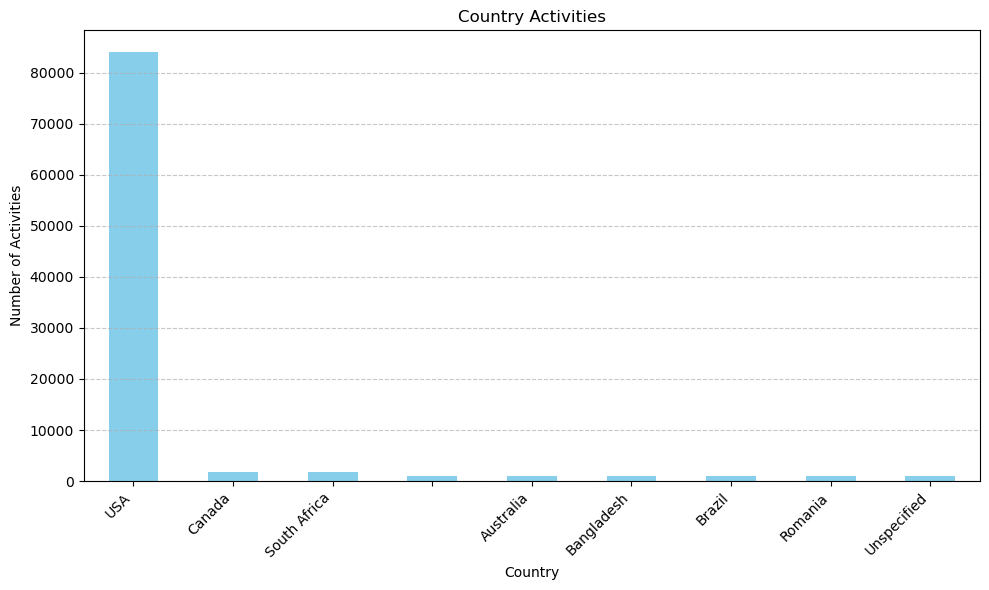

In [20]:
# clean_df.groupby('Country').size().sort_values(ascending=False).plot.bar(title='Country Activities');


# Group data by country and calculate the size of each group
country_activity = clean_df.groupby('Country').size().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6)) 
country_activity.plot(kind='bar', color='skyblue')  
plt.title('Country Activities')  
plt.xlabel('Country')  
plt.ylabel('Number of Activities')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

#plt.yticks(range(0, country_activity.max() + 1, 5000))  # Set interval to 50

plt.tight_layout()  
plt.show()

In [21]:
# clean_df.groupby('Country').size().sort_values(ascending=False).plot.bar(title='Country Activities');


# Group data by country and get size of each group
country_activity = clean_df.groupby('Country').size().sort_values(ascending=False)
country_activity



Country
USA             84093
Canada           1846
South Africa     1846
                  924
Australia         923
Bangladesh        923
Brazil            923
Romania           923
Unspecified       923
dtype: int64

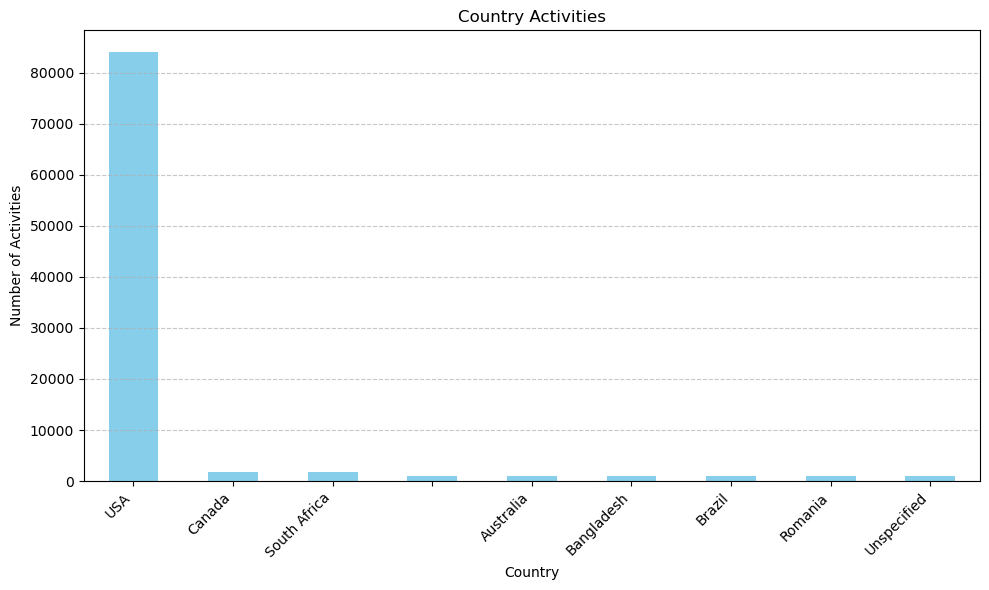

In [22]:
# Bar Plot
plt.figure(figsize=(10, 6)) 
country_activity.plot(kind='bar', color='skyblue')  
plt.title('Country Activities')  
plt.xlabel('Country')  
plt.ylabel('Number of Activities')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

# USA States (Highest and Lowest Sightings)

In [23]:
usa_data = clean_df[clean_df['Country'] == 'USA']
usa_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...
...,...,...,...,...,...,...,...
93318,02/27/2024,21:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
93319,02/27/2024,08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...
93320,02/26/2024,22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...
93321,02/26/2024,21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on..."


In [24]:
usa_data = clean_df[clean_df['Country'] == 'USA']

# Create a new DataFrame for just values under Country-USA
usa_df = pd.DataFrame(usa_data)
usa_df

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...
...,...,...,...,...,...,...,...
93318,02/27/2024,21:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
93319,02/27/2024,08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...
93320,02/26/2024,22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...
93321,02/26/2024,21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on..."


In [25]:
datatypes = df.dtypes 
datatypes

Occurred        object
City            object
State           object
Country         object
Shape           object
Summary         object
Reported        object
Date Occured    object
Time Occured    object
dtype: object

In [26]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84093 entries, 0 to 93322
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Occured  84093 non-null  object
 1   Time Occured  84093 non-null  object
 2   City          84093 non-null  object
 3   State         84093 non-null  object
 4   Country       84093 non-null  object
 5   Shape         84093 non-null  object
 6   Summary       84093 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [27]:
usa_df['Date Occured'] = pd.to_datetime(usa_df['Date Occured'])
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


In [28]:
usa_df['Time Occured'] = pd.to_datetime(usa_df['Time Occured']).dt.time
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


C:\Users\16025\AppData\Local\Temp\ipykernel_23100\3575029116.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_df['Time Occured'] = pd.to_datetime(usa_df['Time Occured']).dt.time


In [29]:
time_values = usa_df['Time Occured'].value_counts()
time_values

Time Occured
19:00:00    1854
22:00:00    1848
21:30:00    1848
21:10:00    1847
18:20:00    1847
            ... 
01:10:00       1
03:00:00       1
13:05:00       1
00:01:00       1
00:15:00       1
Name: count, Length: 120, dtype: int64

In [30]:
state_counts = usa_df['State'].value_counts()
state_counts

State
CA    16625
CO     8307
NY     5539
FL     5539
WA     4655
TX     4615
IA     3693
WI     3693
MI     2778
NM     2771
AZ     2770
VA     1847
MO     1847
MN     1847
OH     1846
WV     1846
OR      928
IL      926
NC      925
OK      925
UT      924
VT      924
KS      924
NV      924
AR      924
ID      924
SD      923
PA      923
NJ      923
SC      923
-       923
TN        4
MT        2
GA        1
LA        1
KY        1
HI        1
ME        1
ND        1
Name: count, dtype: int64

## Top 5

In [31]:
top_5_states = state_counts.head(5)
top_5_states

State
CA    16625
CO     8307
NY     5539
FL     5539
WA     4655
Name: count, dtype: int64

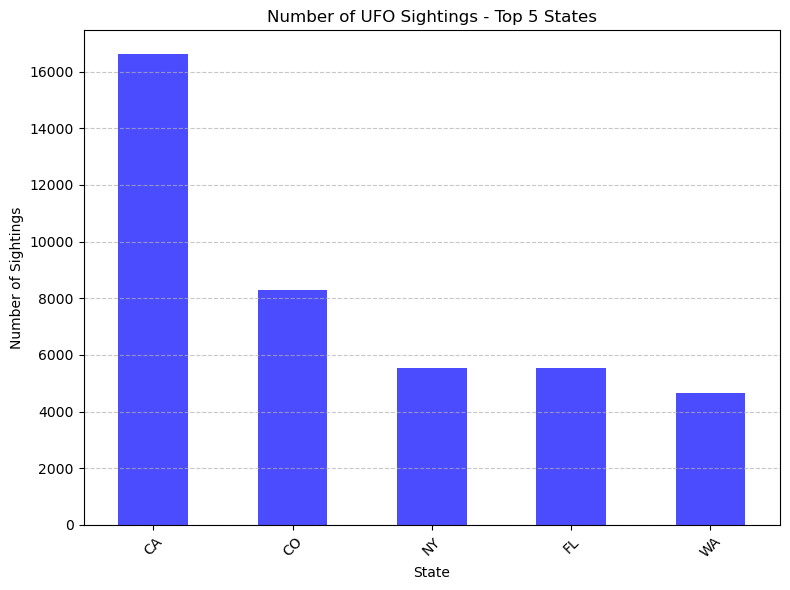

In [32]:
# Top 5 Graph

plt.figure(figsize=(8, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 10

In [33]:
top_10_states = state_counts.head(10)
top_10_states

State
CA    16625
CO     8307
NY     5539
FL     5539
WA     4655
TX     4615
IA     3693
WI     3693
MI     2778
NM     2771
Name: count, dtype: int64

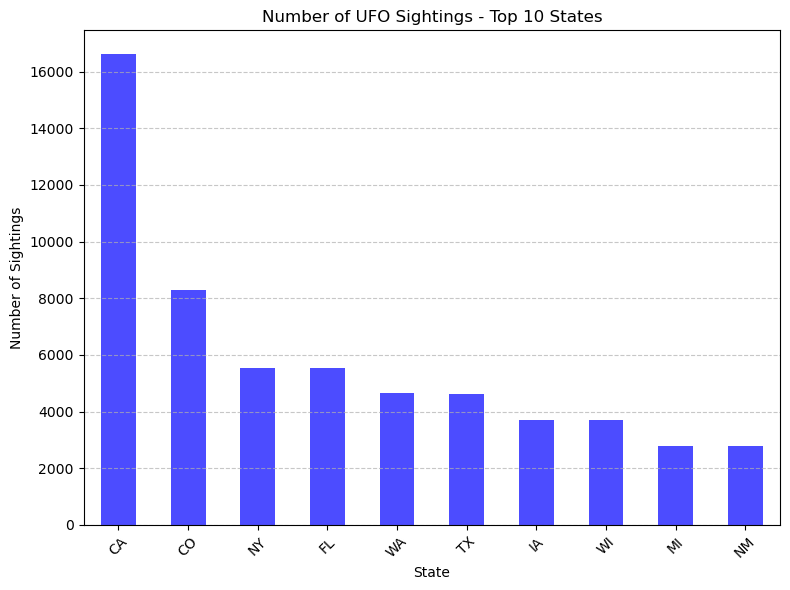

In [34]:
# Top 10 Graph

plt.figure(figsize=(8, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 5

In [35]:
bottom_5_states = state_counts.tail(5)
bottom_5_states

State
LA    1
KY    1
HI    1
ME    1
ND    1
Name: count, dtype: int64

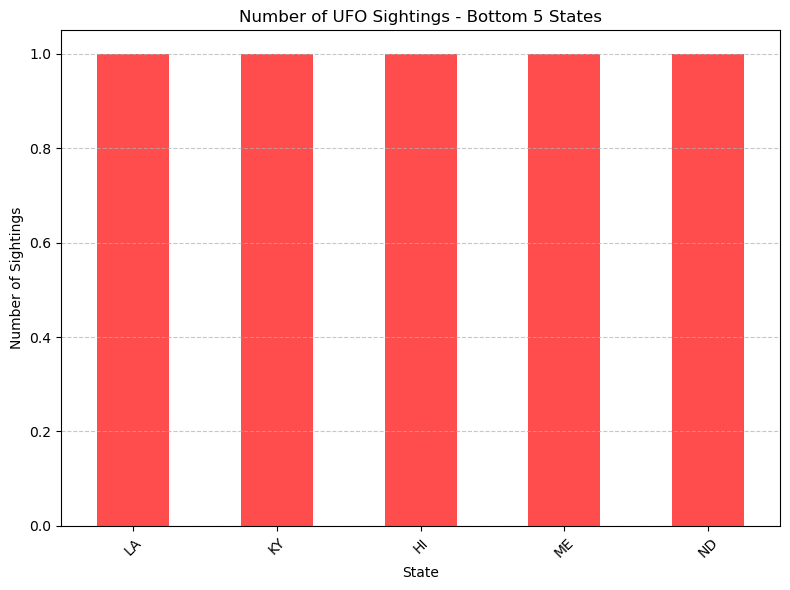

In [36]:
plt.figure(figsize=(8, 6))
bottom_5_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 10


In [37]:
bottom_10_states = state_counts.tail(10)
bottom_10_states

State
SC    923
-     923
TN      4
MT      2
GA      1
LA      1
KY      1
HI      1
ME      1
ND      1
Name: count, dtype: int64

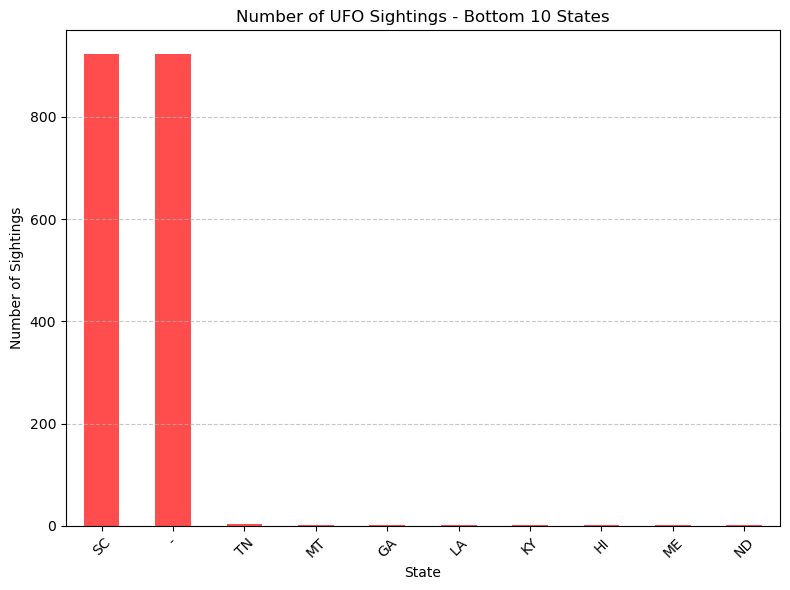

In [38]:
plt.figure(figsize=(8, 6))
bottom_10_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 5 and Bottom 5

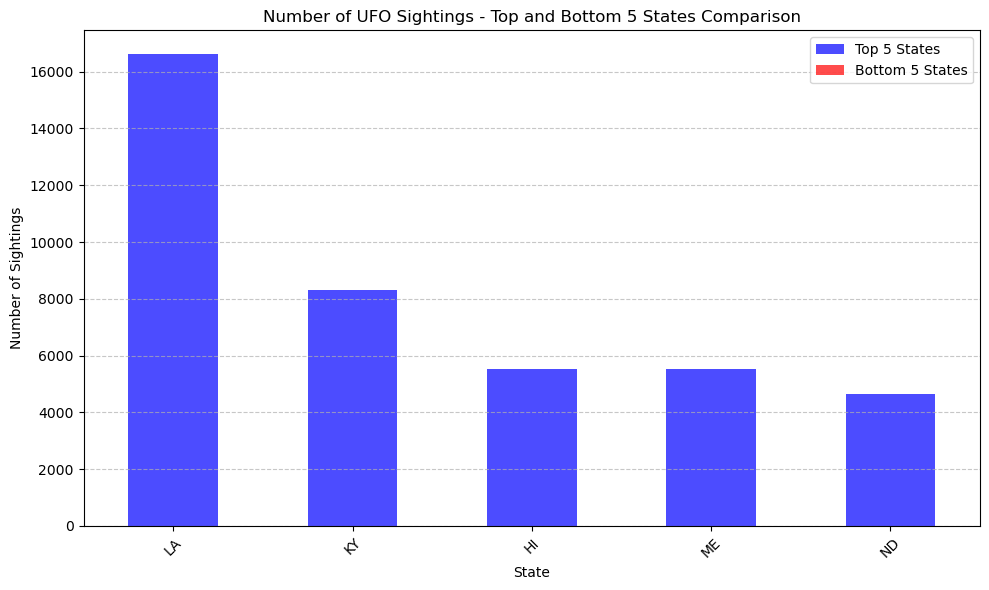

In [39]:
# Combined
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 5 States')
bottom_5_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 5 States')
plt.title('Number of UFO Sightings - Top and Bottom 5 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 10 and Bottom 10

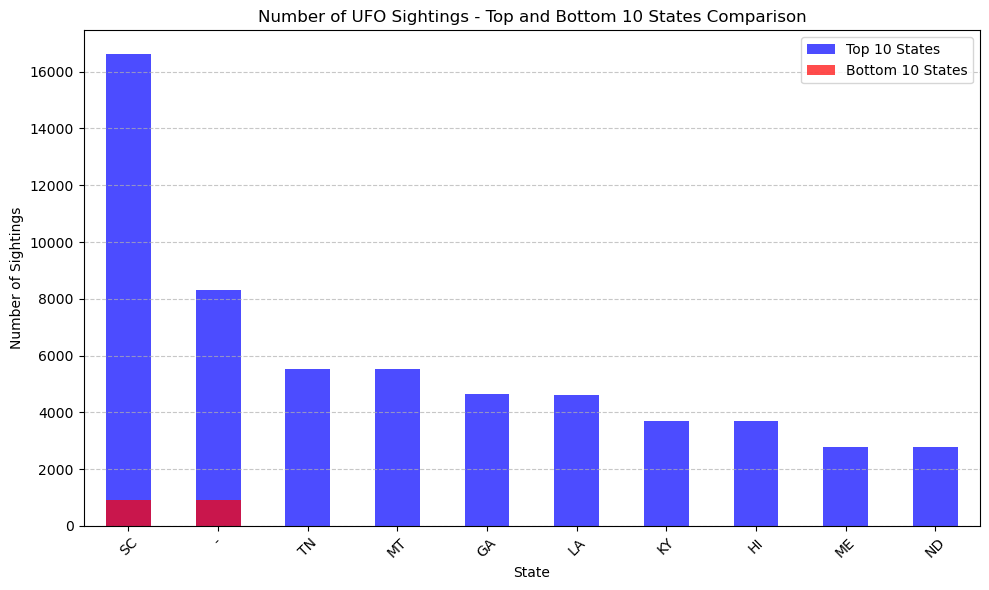

In [40]:
# Combined
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 10 States')
bottom_10_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 10 States')
plt.title('Number of UFO Sightings - Top and Bottom 10 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# USA- Shapes

In [41]:
shape_counts = usa_df['Shape'].value_counts()
shape_counts

Shape
Other        13846
Orb          13845
Light        11076
Circle        6461
Unknown       5539
Triangle      4616
Oval          4615
Fireball      2770
Chevron       2770
Cigar         2769
Sphere        2769
Changing      1846
Cube          1846
Rectangle     1846
Cylinder      1846
Formation     1846
Disk           924
Cross          923
Flash          923
Egg            923
                93
Cone             1
Name: count, dtype: int64

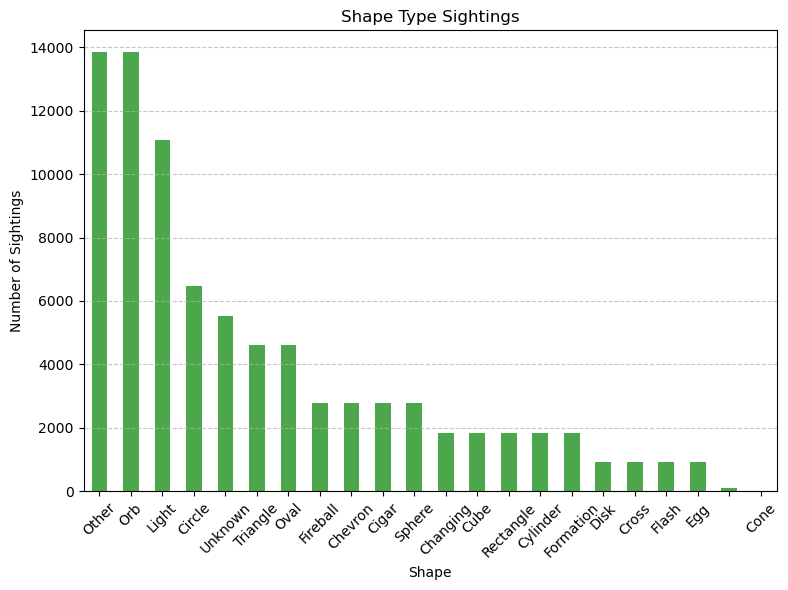

In [42]:
plt.figure(figsize=(8, 6))
shape_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Shape Type Sightings')
plt.xlabel('Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Arizona Reports

In [43]:
az_data = usa_df[usa_df['State'] == 'AZ']
az_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
53,1995-02-19,22:00:00,Phoenix,AZ,USA,,Indep. UFO investigator calls to introduce sel...
110,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
117,2024-03-09,18:30:00,Oro Valley,AZ,USA,Other,Bright white with some translucency (seeing “a...
153,2024-03-04,12:00:00,Scottsdale,AZ,USA,Other,Balloon like object that appeared to be connec...
211,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
...,...,...,...,...,...,...,...
93138,2024-03-09,18:30:00,Oro Valley,AZ,USA,Other,Bright white with some translucency (seeing “a...
93174,2024-03-04,12:00:00,Scottsdale,AZ,USA,Other,Balloon like object that appeared to be connec...
93232,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
93239,2024-03-09,18:30:00,Oro Valley,AZ,USA,Other,Bright white with some translucency (seeing “a...


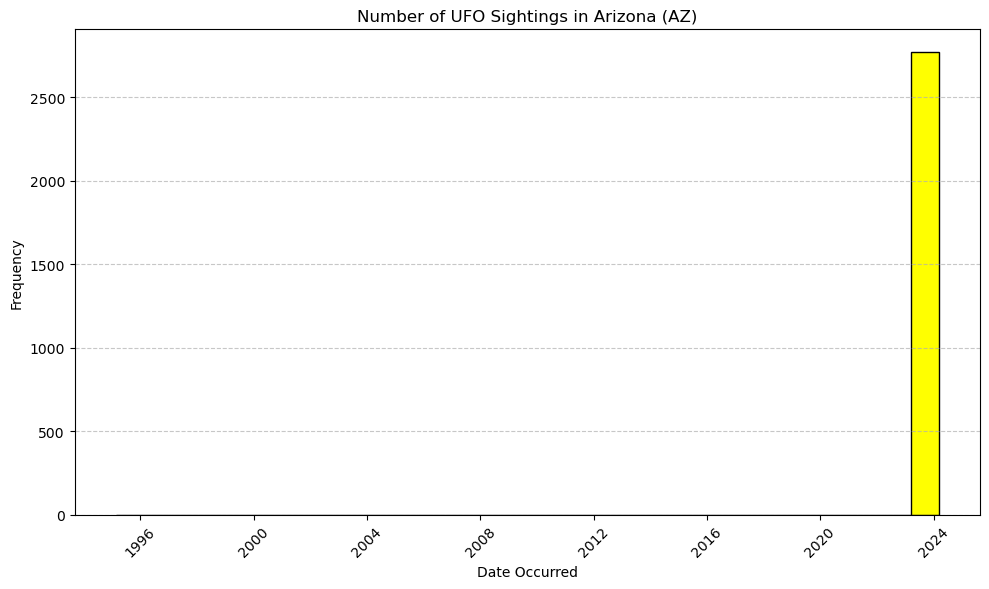

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(az_data['Date Occured'], bins=30, color='yellow', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona (AZ)')
plt.xlabel('Date Occurred')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

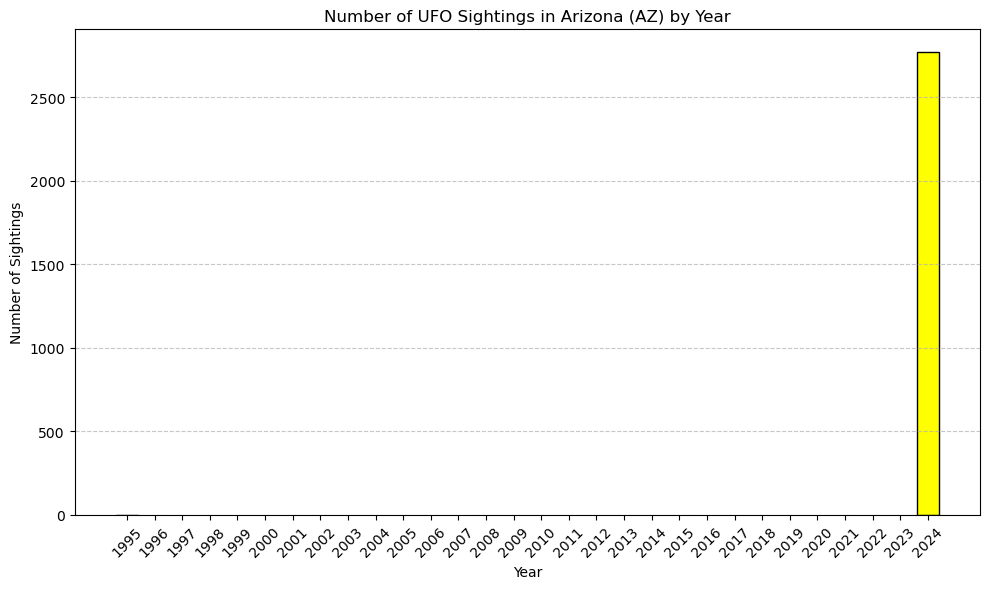

In [45]:
# Only need rows where the 'State' = 'AZ'
az_data = usa_df[usa_df['State'] == 'AZ'].copy()  # Make a copy to avoid the warning

# Get the year from 'Date Occurred' column and make a new column 'Year' 
az_data.loc[:, 'Year'] = az_data['Date Occured'].dt.year

# Need range of years
min_year = az_data['Year'].min()
max_year = az_data['Year'].max()

# number of sightings for each year
year_counts = az_data['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts, color='yellow', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona (AZ) by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')

# x-ticks = all years
plt.xticks(range(min_year, max_year + 1), rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cities/Phoenix

In [46]:
# Count the number of sightings for each city in Arizona
city_counts = az_data['City'].value_counts()

# Sort the cities based on the number of sightings in descending order
sorted_cities = city_counts.sort_values(ascending=False)
print(sorted_cities)

City
Phoenix       924
Oro Valley    923
Scottsdale    923
Name: count, dtype: int64


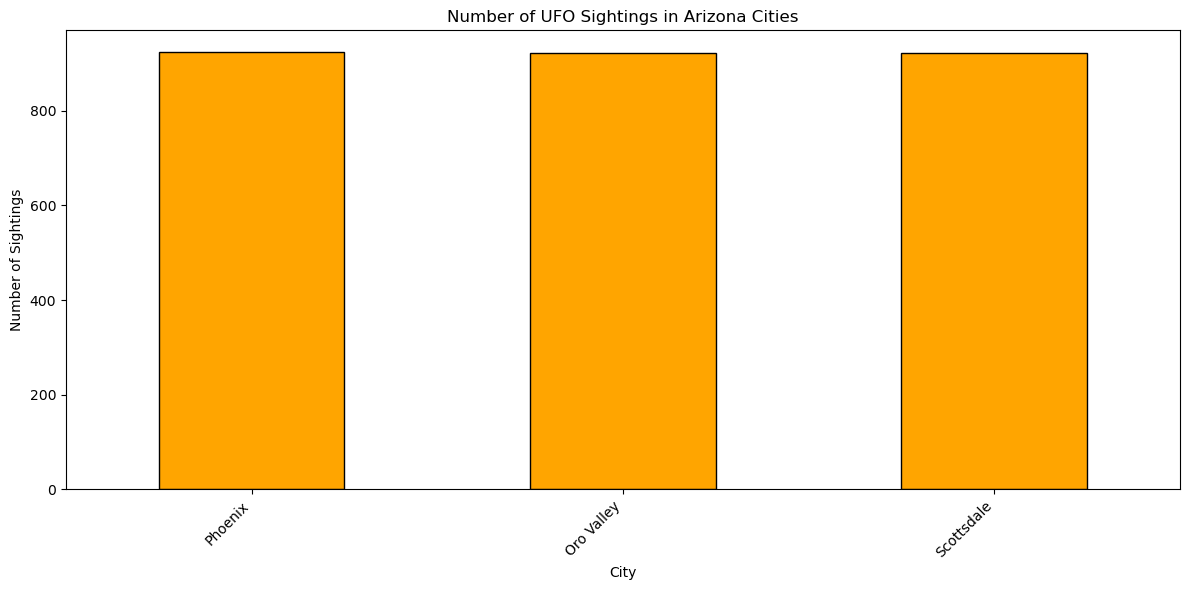

In [47]:
# Plotting
plt.figure(figsize=(12, 6))
sorted_cities.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona Cities')
plt.xlabel('City')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [48]:
## Phoenix
phx_data = usa_df[usa_df['City'] == 'Phoenix']
phx_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
53,1995-02-19,22:00:00,Phoenix,AZ,USA,,Indep. UFO investigator calls to introduce sel...
110,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
211,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
312,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
413,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
...,...,...,...,...,...,...,...
92828,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
92929,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
93030,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."
93131,2024-03-10,22:00:00,Phoenix,AZ,USA,Orb,"Flew in a large oval, about 2 miles, size of a..."


## Years

In [49]:
# # Ran all these years and yielded no results
# year_2019 = usa_df[usa_df['Date Occured'].dt.year == 2019]
# year_2020 = usa_df[usa_df['Date Occured'].dt.year == 2020]
# year_2021 = usa_df[usa_df['Date Occured'].dt.year == 2021]
# year_2022 = usa_df[usa_df['Date Occured'].dt.year == 2022]
# year_2023 = usa_df[usa_df['Date Occured'].dt.year == 2023]


In [50]:
year_2024 = usa_df[usa_df['Date Occured'].dt.year == 2024]
year_2024

,Date Occured,Time Occured,City,State,Country,Shape,Summary
103,2024-03-12,11:00:00,Platteville,WI,USA,Changing,5 Crafts in Formation
104,2024-03-12,04:40:00,Fort Smith,AR,USA,Unknown,Immediately after watching Space X Dragon flew...
105,2024-03-11,22:11:00,Oscoda,MI,USA,Fireball,"Stunningly well-defined ball of white, green a..."
106,2024-03-11,21:30:00,Hopewell,VA,USA,Formation,Six or seven lights on sky. Seemed quite close.
108,2024-03-11,07:58:00,Lenoir,NC,USA,Oval,Two white/metallic oval-sphere unidentifiable ...
...,...,...,...,...,...,...,...
93318,2024-02-27,21:00:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
93319,2024-02-27,08:10:00,Escondido,CA,USA,Other,The plane like object turned around in mid air...
93320,2024-02-26,22:10:00,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...
93321,2024-02-26,21:40:00,New York,NY,USA,Light,"Light flew by then went away , small almost on..."


In [51]:
daily_counts_2024 = year_2024.groupby(year_2024['Date Occured'].dt.date).size()
daily_counts_2024


Date Occured
2024-02-26     2769
2024-02-27     1846
2024-02-28     4615
2024-02-29     6461
2024-03-01     6461
2024-03-02     3692
2024-03-03    12922
2024-03-04    15691
2024-03-05     7384
2024-03-06      923
2024-03-07     4615
2024-03-08     1846
2024-03-09     4615
2024-03-10     4615
2024-03-11     3692
2024-03-12     1846
dtype: int64

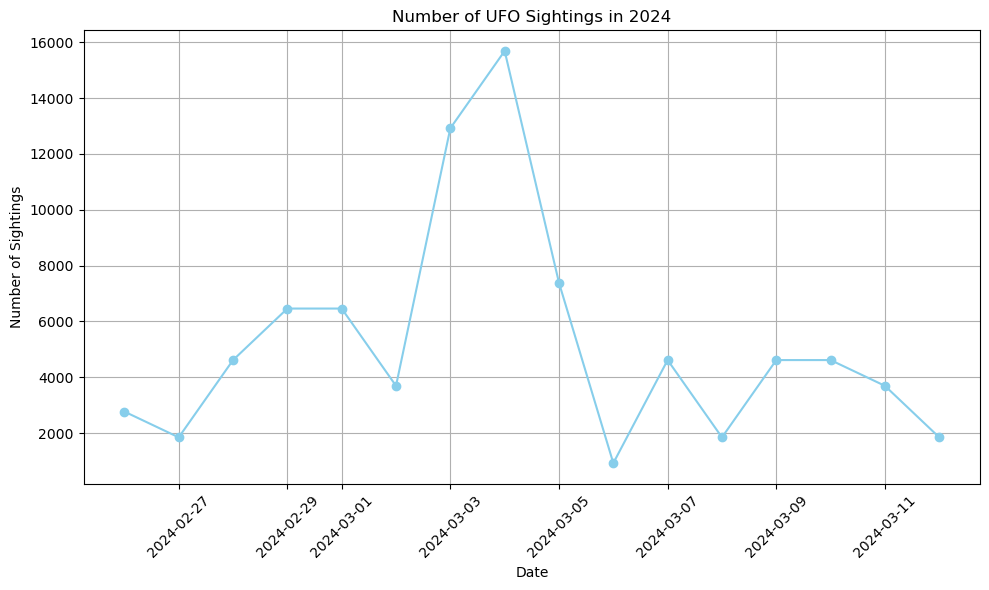

In [52]:
# Plotting 
plt.figure(figsize=(10, 6))
daily_counts_2024.plot(kind='line', marker='o', color='skyblue')

plt.title('Number of UFO Sightings in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()